In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

#pd.reset_option('all')

pd.options.display.max_rows = 3000
%matplotlib inline 




In [2]:
data = pd.read_table('WELLCOME_APCspend2013_forThinkful.csv', delimiter=',')
data.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)' : 'Cost'}, inplace=True)
data.head()

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
clean = data
clean['Journal title'] = clean['Journal title'].str.strip()
clean['Journal title'] = clean['Journal title'].str.lower()
#clean['Journal title'] = clean['Journal title'].str.capitalize()

#Find NANs
#clean.loc[clean['ColName'].str.contains('NaN')]


#remove NAN
clean.loc[clean['Journal title'].isna(),'Journal title'] = 'Unknown'
clean.loc[clean['PMID/PMCID'].isna(),'PMID/PMCID'] = 'Unknown'

# Combine Common Journals
clean.loc[clean['Journal title'].str.startswith('acta'),'Journal title'] = 'acta' 
clean.loc[clean['Journal title'].str.contains('journal of experimental psychology'),'Journal title'] = 'journal of experimental psychology' 
clean.loc[clean['Journal title'].str.contains('lancet'),'Journal title'] = 'lancet' 
clean.loc[clean['Journal title'].str.contains('philos trans'),'Journal title'] = 'philos trans' 
clean.loc[clean['Journal title'].str.contains('pnas' or 'proceddings' or 'proc natl' or 'proceddings of the national academy' or 'proceedings of the national academy'),'Journal title'] = 'proceedings of the national academy of sciences' 
clean.loc[clean['Journal title'].str.contains('lancet'),'Journal title'] = 'lancet' 
clean.loc[clean['Journal title'].str.startswith('reproductive'),'Journal title'] = 'reproductive' 
clean.loc[clean['Journal title'].str.startswith('embo'),'Journal title'] = 'embo'
clean.loc[clean['Journal title'].str.startswith('febs'),'Journal title'] = 'febs'
clean.loc[clean['Journal title'].str.contains('jaids' or 'immune deficiency'),'Journal title'] = 'journal of acquired immune deficiency syndromes'
clean.loc[clean['Journal title'].str.contains('proceedings of the royal society' or 'proceedings b' or 'proceedings of royal society'),'Journal title'] = 'proceedings of the royal society' 




# Clean various mispellings and abbreviations
clean['Journal title'] = clean['Journal title'].str.replace('americal','american')
clean['Journal title'] = clean['Journal title'].str.replace('biochem','biochemical')
clean['Journal title'] = clean['Journal title'].str.replace('journals','journal')
clean['Journal title'] = clean['Journal title'].str.replace('febs','faseb')
clean['Journal title'] = clean['Journal title'].str.replace('ophthalmology','opthalmology')
clean['Journal title'] = clean['Journal title'].str.replace('tissue engineering: part a','tissue engineering')
clean['Journal title'] = clean['Journal title'].str.replace('american journal of medical genetics part a','american journal of medical genetics')
clean['Journal title'] = clean['Journal title'].str.replace('jrn','journal')
clean['Journal title'] = clean['Journal title'].str.replace('epidemology','epidemiology')
clean['Journal title'] = clean['Journal title'].str.replace('&','and')
clean['Journal title'] = clean['Journal title'].str.replace('heptology','hepatology')
clean['Journal title'] = clean['Journal title'].str.replace('human mutation: variation, informatics, and disease','human mutation')
clean['Journal title'] = clean['Journal title'].str.replace('letters','')
clean['Journal title'] = clean['Journal title'].str.replace('journal of clinical endocrinology and metabolism','journal of clinical endocrinology')
clean['Journal title'] = clean['Journal title'].str.replace(',','')
clean['Journal title'] = clean['Journal title'].str.replace('springer science + business media','springer')
clean['Journal title'] = clean['Journal title'].str.replace('studies in history and philosophy of science part c: studies in history and philosophy of biological and biomedical sciences','studies in history and philosophy of science')
clean['Journal title'] = clean['Journal title'].str.replace('the lancet neurology','the lancet')
clean['Journal title'] = clean['Journal title'].str.replace('sciences','science')
clean['Journal title'] = clean['Journal title'].str.replace('thorax an international journal for respiratory medicine','thorax')
clean['Journal title'] = clean['Journal title'].str.replace('experiements','experiments')
clean['Journal title'] = clean['Journal title'].str.replace('expermiments','experiments')
clean['Journal title'] = clean['Journal title'].str.replace('rna biology','rna')
clean['Journal title'] = clean['Journal title'].str.replace('sci rep','scientific reports')
clean['Journal title'] = clean['Journal title'].str.replace('epidemiology','epidemiol')
clean['Journal title'] = clean['Journal title'].str.replace('epidemiol','epidemiology')
clean['Journal title'] = clean['Journal title'].str.replace('virology','virol')
clean['Journal title'] = clean['Journal title'].str.replace('virol','virology')
clean['Journal title'] = clean['Journal title'].str.replace('virological methods','virology')
clean['Journal title'] = clean['Journal title'].str.replace('marten child nutr','maternal and child nutrition')
clean['Journal title'] = clean['Journal title'].str.replace('mbio','math biosci')
clean['Journal title'] = clean['Journal title'].str.replace('microbes infect','microbes and infection')
clean['Journal title'] = clean['Journal title'].str.replace('mol biol','molecular biology')
clean['Journal title'] = clean['Journal title'].str.replace('molecular biology and evolution','molecular biology')
clean['Journal title'] = clean['Journal title'].str.replace('nephrology dialysis transplantation','nephrology dialysis and transplantation')
clean['Journal title'] = clean['Journal title'].str.replace('neuroimage: clinical','neuroimage')
clean['Journal title'] = clean['Journal title'].str.replace('public library of science one','public library of science')
clean['Journal title'] = clean['Journal title'].str.replace('1','one')
clean['Journal title'] = clean['Journal title'].str.replace('  ',' ')
clean['Journal title'] = clean['Journal title'].str.replace('   ',' ')
clean['Journal title'] = clean['Journal title'].str.replace('    ',' ')
clean['Journal title'] = clean['Journal title'].str.replace('.','')
clean['Journal title'] = clean['Journal title'].str.replace('behaviour','behavior')
clean['Journal title'] = clean['Journal title'].str.replace('opinions','opinion')
clean['Journal title'] = clean['Journal title'].str.replace('opinion','opinions')
clean['Journal title'] = clean['Journal title'].str.replace('psychiatty','psychiatry')
clean['Journal title'] = clean['Journal title'].str.replace('mol ','molecular')
clean['Journal title'] = clean['Journal title'].str.replace('hum resour health','human resources for health')
clean['Journal title'] = clean['Journal title'].str.replace('am j ','american journal of ')
clean['Journal title'] = clean['Journal title'].str.replace('int j ','international journal of ')
clean['Journal title'] = clean['Journal title'].str.replace('j ','journal of ')
clean['Journal title'] = clean['Journal title'].str.replace('visul ','visual')
clean['Journal title'] = clean['Journal title'].str.replace('faseb journal','faseb')
clean['Journal title'] = clean['Journal title'].str.replace('eur j immunol ','european journal of immunology')
clean['Journal title'] = clean['Journal title'].str.replace('child: care heath and development ','child: care health development')
clean['Journal title'] = clean['Journal title'].str.replace('jnl ','journal of')
clean['Journal title'] = clean['Journal title'].str.replace('jnl','journal')
clean['Journal title'] = clean['Journal title'].str.replace('virology journal','virology')
clean['Journal title'] = clean['Journal title'].str.replace('gentics','genetics')
clean['Journal title'] = clean['Journal title'].str.replace('eur journal of immunol','european journal of immunology')
clean['Journal title'] = clean['Journal title'].str.replace('journal of cell science', 'journal of cell sci')
clean['Journal title'] = clean['Journal title'].str.replace('journal of cell sci', 'journal of cell science')
clean['Journal title'] = clean['Journal title'].str.replace('neurolmage','neuroimage')
clean['Journal title'] = clean['Journal title'].str.replace('biological chemistry','biol chem')
clean['Journal title'] = clean['Journal title'].str.replace('biol chem','biological chemistry')
clean['Journal title'] = clean['Journal title'].str.replace('journal of biol chemistry','journal of biological chemistry')
clean['Journal title'] = clean['Journal title'].str.replace('nucleic acid research','nucleic acids research')
clean['Journal title'] = clean['Journal title'].str.replace('plosone','plos one')
clean['Journal title'] = clean['Journal title'].str.replace('pone-done2-one7947','plos one')
clean['Journal title'] = clean['Journal title'].str.replace('pntd','plos neglected tropical diseases')
clean['Journal title'] = clean['Journal title'].str.replace('negected','neglected')
clean['Journal title'] = clean['Journal title'].str.strip()
clean['Journal title'] = clean['Journal title'].str.lower()

#Remove symbols from Cost and convert to numeric
clean['Cost'] = clean['Cost'].str.replace('£','')
clean['Cost'] = clean['Cost'].str.replace('$','')
clean['Cost'] = pd.to_numeric(clean['Cost'])
    

# Update extreme Cost outliers to the most common cost
clean.loc[clean['Cost'] == 999999,'Cost'] = 2040

# Update a couple additional outliers to highest cost
clean.loc[clean['Cost'] > 6000,'Cost'] = 6000

#Check journal names to see if further cleaning is needed
clean['Journal title'].value_counts().sort_index(ascending=True)

academy of nutrition and dietetics                                                             1
acs chemical biology                                                                           5
acs chemical neuroscience                                                                      1
acs nano                                                                                       2
acta                                                                                          16
addiction                                                                                      2
advances in experimental medicine and biology                                                  4
age                                                                                            2
age and ageing                                                                                 1
ageing and society                                                                             1
aging cell                    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104327e80>]],
      dtype=object)

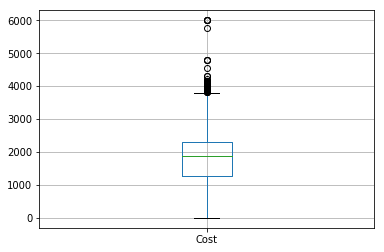

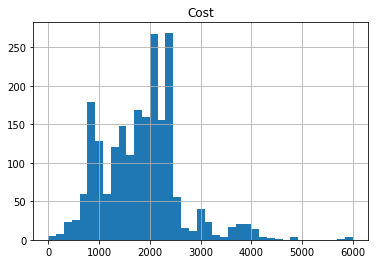

In [4]:
#identify outliers

clean.boxplot('Cost')
clean.hist('Cost', bins='auto')

In [5]:
summary = clean.groupby(['Journal title'])['Cost'].describe().sort_values(by='count', ascending=False)
summary.head(5)

#Filter out the Top 5 most popular journals
#top5 = summary[:5]
#top5.head(100)

,count,mean,std,min,25%,50%,75%,max
Journal title,,,,,,,,
plos one,208.0,1007.146442,456.033720,122.31,852.505,899.740,1044.7325,6000.00
journal of biological chemistry,59.0,1431.537797,398.646996,265.67,1156.405,1343.390,1604.9550,2501.07
neuroimage,36.0,2057.318056,466.871610,987.75,1762.690,2289.245,2396.0450,2518.23
proceedings of the national academy of science,31.0,827.242581,454.563831,206.32,656.085,734.000,792.5100,2691.68
nucleic acids research,29.0,1162.344828,442.150934,710.00,852.000,852.000,1704.0000,2184.00


In [6]:
#Parse all Journal titles into a single list of all words
list_allwords = []
print(type(list_allwords))
clean['Journal title'].str.split(' ').apply(list_allwords.extend)


#Load the list into a DataFrame in order to sort words by # of occurances
allwords = []
allwords = pd.DataFrame(list_allwords, columns=['Words'])
allwords['Words'].value_counts().sort_values(ascending=False)


<class 'list'>


of                          646
journal                     539
plos                        300
and                         227
one                         208
the                         132
science                      96
research                     92
chemistry                    89
biology                      89
molecular                    88
in                           84
cell                         82
genetics                     78
biological                   76
medicine                     74
neuroscience                 60
international                59
health                       56
human                        51
proceedings                  47
clinical                     45
diseases                     44
academy                      43
psychiatry                   43
american                     43
bmc                          43
national                     41
brain                        37
neuroimage                   36
society                      35
tropical

In [7]:
#Create a list of categories by determining which words are true medical terms and which can be ignored

#Copy structure of allwords dataframe into a new dataframe called categories
categories = pd.DataFrame(columns=allwords.columns, index=allwords.index) 

#Hardcode list of suffixes that are likely a medical term
suffixes = ['neuro','ology','itis','etics','brain','acids','cellular','ogen','infect','immun','tive','cerebral','blood','behav','psych','aging','ergy','obial','cancer','enia','ism','ics','chem','atory','etic','osis','vasc','iety','ity','sion','cy','olog','imag','sia','tric','gist','etry','otic','ical','ogic','aphy','nia','scopy','cular','ties','tive','psy','ation','ory','itis','asis','plos','faseb','cell','movement','gene','age','movement' ]

#loop through all suffixes. If the suffix exists in allwords, pull that word out and append into categories df
for suffix in suffixes:
    categories = categories.append(allwords.loc[allwords['Words'].str.contains(suffix)])

categories = categories.drop_duplicates()
categories = categories.dropna()
categories


,Words
71,neuroscience
112,neurophysiology
667,neurology
734,neuroinflammation
966,neurosurgery
1171,neuropsychological
1396,neuroimage
1644,neurobiology
1716,neuropsychopharmacology
2026,neurological


In [8]:
#Assign each Journal title in the master list to a "Category" 
#based on whether the keyword exists in the journal title

#place the categories dataframe into a python list
list = categories['Words']

#function to categorize a given journal title into one of the categories
def categorize(x):
    for word in list:
        #print(type(word))
        #print(word)
        if word in x:
            return word
    
    return ''



#loop through each row in the master data set, assign a category for each by calling the categorize function
for index, row in clean.iterrows():
    clean.at[index, 'Category'] = categorize(row['Journal title'])
   

#assign category Unkown to any remaining rows without a category
clean.at[clean['Category'] == '','Category'] = 'Unknown'
#clean.loc[clean['Category'] == '','Journal title'].value_counts()


#clean['Category'].value_counts()


In [9]:
#display costs by category
clean.groupby(['Category'])['Cost'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Unknown,372.0,1952.135000,884.542399,9.93,1321.3450,1910.275,2351.2475,6000.00
plos,218.0,1013.843761,455.520622,122.31,853.3200,904.115,1047.1925,6000.00
chem,143.0,1549.797273,533.441773,265.67,1206.8250,1552.260,1872.2450,3026.17
biology,122.0,2003.627295,741.859259,340.00,1551.5950,1966.990,2290.1800,4112.54
genetics,86.0,1894.947791,598.016318,346.25,1687.2050,2040.000,2203.9125,3938.82
neuroscience,61.0,1745.763279,722.833302,159.91,1186.8000,1896.980,2333.7100,3211.77
cell,57.0,2856.839123,1018.187524,364.17,2040.0000,2987.000,3877.4600,4226.04
national,39.0,873.427692,493.716335,206.32,638.2900,751.840,842.3650,2691.68
brain,37.0,1989.770270,447.379227,476.57,1889.1000,2040.000,2355.5200,2539.89
